                                              ..-
    PyKat develop         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



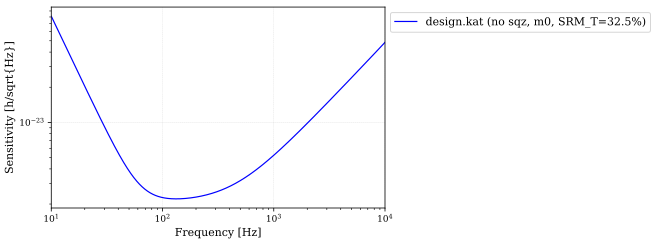

In [1]:
from pykat import finesse
from pykat.commands import *
import pykat.external.peakdetect as peak
import pykat.ifo.aligo as aligo
import pykat.ifo.aligo.plot as aligoplt
import gwinc as gwinc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
pykat.init_pykat_plotting(dpi=90)

aLIGO = aligo.make_kat()
aLIGO.maxtem = -1 #USE PLANE WAVES MODEL FIRST (speed, complexity...)
TT=0.325 #better match to sites
aLIGO.SRM.setRTL(1-TT-aLIGO.SRM.L,TT,aLIGO.SRM.L)
aLIGO=aligo.setup(aLIGO)

fig,ax=plt.subplots()
freqs=np.logspace(1,4,1000)
aligoplt.strain_sensitivity(aLIGO,ax=ax,
                            lower=freqs[0],upper=freqs[-1],steps=len(freqs),
                            plot_cmds={'label':'design.kat (no sqz, m0, SRM_T=32.5%)'})
plt.legend(loc=2,bbox_to_anchor=(1,1))

In [2]:
def getPF(aligokat,printit=False):
    k=aligokat.deepcopy()
    k.parse("""
    pd PX nETMX1
    pd PS nSRM1
    pd PP nPRM2
    cp cavPRX x finesse
    cp cavSRX x finesse
    cp cavXARM x finesse
    """)
    k.noxaxis=True
    o=k.run()
    if printit:
        print("""
    Cav:      Finesse:     Pcirc:
    Xarm      {:.3g}       {:.3g}
    PRX       {:.4f}       {:.4g}
    SRX       {:.4f}       {:.4g}
        """.format(o["cavXARM_x_finesse"], o["PX"],
                  o["cavPRX_x_finesse"], o["PP"],
                  o["cavSRX_x_finesse"], o["PS"]))
    
    return [o["cavXARM_x_finesse"], o["PX"],
                  o["cavPRX_x_finesse"], o["PP"],
                  o["cavSRX_x_finesse"], o["PS"]]

In [3]:
def printTs(aligokat):
    k = aligokat.deepcopy()
    print("""
    Optic:       Transmission:      Loss
    ITMX         {:.4g}             {:.4g}
    ITMY         {:.4g}             {:.4g}
    PRM          {:.4g}             {:.4g}
    SRM          {:.4g}             {:.4g}
    """.format(float(k.ITMX.T), float(k.ITMX.L), float(k.ITMY.T), float(k.ITMY.L), float(k.PRM.T), float(k.PRM.L), float(k.SRM.T), float(k.SRM.L)))

## vary the arm finesse (only)

In [ ]:
fig,ax=plt.subplots()

#reference line
aligoplt.strain_sensitivity(aLIGO,ax=ax,
                            plot_cmds={'label':'design.kat (no sqz, m0, SRM_T=32.5%)','ls':'--','lw':2})

#scan ITM reflectivities (logarithmically seems to give uniform spacing in QNLS)
sfs = np.linspace(1,0.5,5)
cols=cm.jet(np.linspace(0,1,len(sfs)))
for i in range(len(sfs)):
    sf=sfs[i]
    base=aLIGO.deepcopy()
    base.ITMX.setRTL(1-aLIGO.ITMX.T*sf-aLIGO.ITMX.L,aLIGO.ITMX.T*sf,aLIGO.ITMX.L)
    base.ITMY.setRTL(1-aLIGO.ITMY.T*sf-aLIGO.ITMY.L,aLIGO.ITMY.T*sf,aLIGO.ITMY.L)
    print("ITMX transmission now {:.3g}".format(float(base.ITMX.T)))
    print("running setup()")
    base = aligo.setup(base) #VERY NECESSARY TO MAINTAIN RESONANCE!
    cavvals=getPF(base)
    aligoplt.strain_sensitivity(base,ax=ax,
                                plot_cmds={'label':'sf={:.2f}: ITMX_T={:.3g}\n(F={:.3f}, Parm={:.3g})'.format(
                                    sf,float(base.ITMX.T),cavvals[0],cavvals[1]),
                                          'color': cols[i]})

plt.legend(loc=2,bbox_to_anchor=(1,1))


## vary the PRC finesse (only)

PRM transmission now 0.3
running setup()
PRM transmission now 0.169
running setup()
PRM transmission now 0.0949
running setup()
PRM transmission now 0.0533
running setup()
PRM transmission now 0.03
running setup()
PRM transmission now 0.0169
running setup()
PRM transmission now 0.00949
running setup()
PRM transmission now 0.00533
running setup()
PRM transmission now 0.003
running setup()


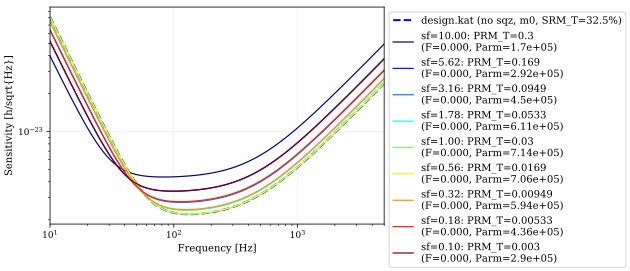

In [5]:
fig,ax=plt.subplots()

#reference line
aligoplt.strain_sensitivity(aLIGO,ax=ax,
                            plot_cmds={'label':'design.kat (no sqz, m0, SRM_T=32.5%)','ls':'--','lw':2})

#scan PRM reflectivities 
sfs = np.logspace(1,-1,9)
cols=cm.jet(np.linspace(0,1,len(sfs)))
for i in range(len(sfs)):
    sf=sfs[i]
    base=aLIGO.deepcopy()
    base.PRM.setRTL(1-aLIGO.PRM.T*sf-aLIGO.PRM.L,aLIGO.PRM.T*sf,aLIGO.PRM.L)
    print("PRM transmission now {:.3g}".format(float(base.PRM.T)))
    print("running setup()")
    base = aligo.setup(base) #VERY NECESSARY TO MAINTAIN RESONANCE!
    cavvals=getPF(base)
    aligoplt.strain_sensitivity(base,ax=ax,
                                plot_cmds={'label':'sf={:.2f}: PRM_T={:.3g}\n(F={:.3f}, Parm={:.3g})'.format(
                                    sf,float(base.PRM.T),cavvals[2],cavvals[1]),
                                          'color': cols[i]})

plt.legend(loc=2,bbox_to_anchor=(1,1))


tune PRM_T to meet target P_arm (could be max or a specified value)

In [4]:
def tuneT(LIGOkat,optic='PRM',node='nETMX1',val=0.03,precision=0.025,
          target_precision=0.001,target='max',debug=False):
    """
    scans and optimizes the power at a target node 
    by adjusting the transmissivity of an optic.
    Aims to function much like IFO.scan_to_precision, 
    but for mirror tranmissivities rather than tunings.
    assumes optical loss should be unchanged.
    
    Warning: 
    It's slow! The ifo is re-tuned using setup() for 
    each transmissivity to ensure it's in an operational 
    state.
    
    val = initial value at center of search range
    precision = initial range of search
    target_precision = last step range of search. Setting
            target_precision=None turns off the loop.
    target = power that should be measured at that node.
            Should be a float, or 'max' if aim is to
            maximise, whatever the final value might be.       
    
    """
    if target_precision == None:
        target_precision=precision
    while precision>=target_precision:
        #1. scan over the initial range of T-values
        Pvals=[]
        Tvals = np.linspace(val-precision,val+precision,40)
        for tt in Tvals:
            k = LIGOkat.deepcopy()
            k.parse("pd Pow {}".format(node))
            k.noxaxis=True
            k.components[optic].setRTL(1-tt-k.components[optic].L, tt,k.components[optic].L)
            #running setup to ensure the ifo is on resonance
            k = aligo.setup(k) # not lock-dragging: we're comparing 2 diff ifos here not drifting states within 1
            o=k.run()
            Pvals.append(o['Pow'])
        #2. find the T-value for which the power is closest to the target
        if target=='max':
            T_out = Tvals[np.argmax(Pvals)]
            P_out = np.max(Pvals)
        else:
            #compare all vals to the target and find the minima
            diffs = [np.abs(P-target) for P in Pvals]#np.abs(Pvals-target)
            _max,_min = peak.peakdetect(diffs,Tvals,1) #not sure we really need a fancy peak detector here...
            Topts = [p[0] for p in _min] #X-vals for the minima. p[1] contains the values of those minima
            Popts = [Pvals[list(Tvals).index(x)] for x in Topts] #Y-vals corresponding to the minima
            #if there's more than one closest match, select the one thats closest to the originally considered value of X (center)
            diffs2 = [abs(x-val) for x in Topts]
            T_out=Topts[np.argmin(diffs2)]
            P_out=Popts[np.argmin(diffs2)]    
        if debug:
            plt.figure()
            plt.plot(Tvals,Pvals,'-x')
            plt.plot(T_out,P_out,'o')
            plt.xlabel("{} transmission".format(optic))
            plt.ylabel("power at {}".format(node))
            plt.show(block=0)
        val = round(T_out,4)
#         precision = 3*abs(Tvals[1]-Tvals[0]) #new precision looks over 3 steps either side of last run
        precision /= 5
    return T_out, P_out

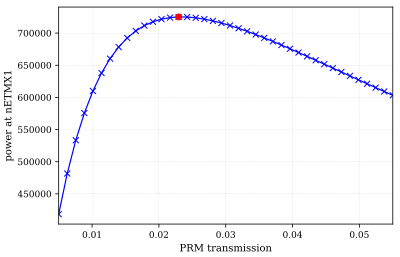

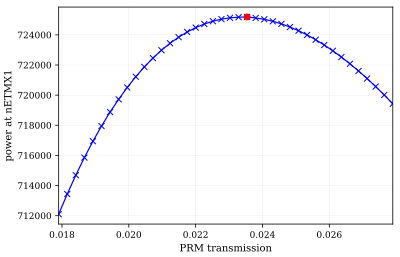

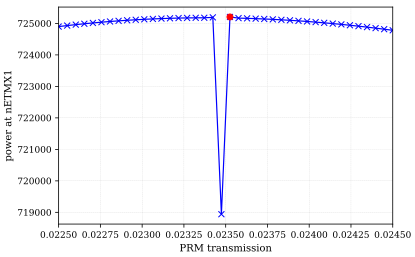

maximum power = 725205.118626481 at T=0.0235


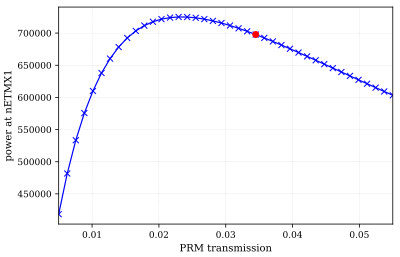

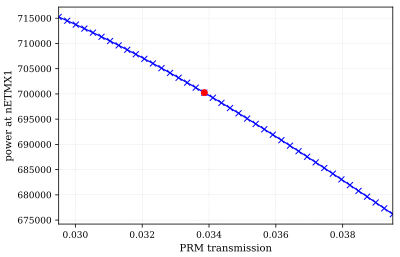

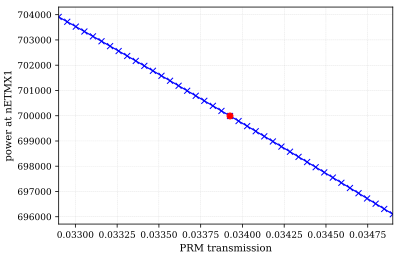

power = 699989.785417113 at T=0.0339 (target was 700000)


In [7]:
T,P = tuneT(aLIGO,debug=True,target_precision=1e-3) 
print("maximum power = {} at T={}".format(P,T))

TT = 700000
T,P = tuneT(aLIGO,debug=True,target=TT) 
print("power = {} at T={} (target was {})".format(P,T,TT))

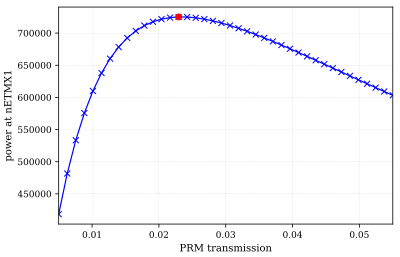

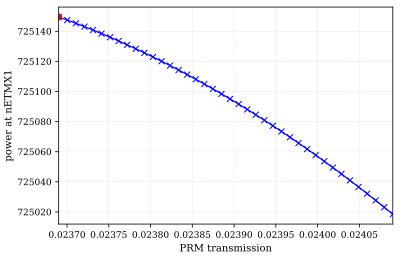

In [8]:
#manual search of that weird dip near the max...
#tuneT(LIGOkat,optic='PRM',node='nETMX1',val=0.03,precision=0.025,target_precision=0.001,target='max',debug=False)

T,P = tuneT(aLIGO,debug=True,target_precision=None) 
# T,P = tuneT(aLIGO,debug=True,target_precision=None,val=0.024,precision=0.005) 
T,P = tuneT(aLIGO,debug=True,target_precision=None,val=0.02389,precision=0.0002) 


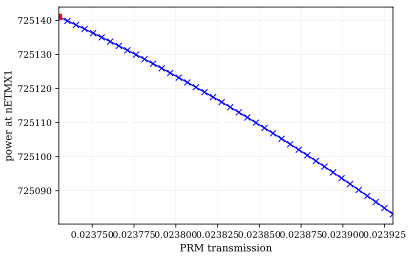

In [9]:
T,P = tuneT(aLIGO,debug=True,target_precision=None,val=0.02383,precision=0.0001) 

alternate faster function that skips running setup each time:

In [5]:
#updated func using xaxis on transmission - can't run setup each step this way, and can't lock drag if use single run for it.
#this version 2 always opts for the second crossing point if matching a target, rather than whichever is least different

def quicktuneT2(LIGOkat,optic='PRM',node='nETMX1',val=0.03,precision=0.025,
          target_precision=0.001,target='max', res=40, debug=False):
    """
    scans and optimizes the power at a target node 
    by adjusting the transmissivity of an optic.
    Aims to function much like IFO.scan_to_precision, 
    but for mirror tranmissivities rather than tunings.
    assumes optical loss should be unchanged.
    
    Warning: 
    It's slow-ish. But importantly, setup() is NOT run
    between T-values, so check it's accuracy vs the above first!
    The first run should always cover as much of the possible 
    T-value range as possible
    
    val = initial value at center of search range
    precision = initial range of search
    target_precision = last step range of search. Setting
            target_precision=None turns off the loop.
    target = power that should be measured at that node.
            Should be a float, or 'max' if aim is to
            maximise, whatever the final value might be. 
    res = number of steps per run (choose higher if not iterating!)
    
    """
    if target_precision == None:
        target_precision=precision
    while precision>=target_precision:
        ##1. scan over the initial range of T-values
        k=LIGOkat.deepcopy()
        k.removeBlock("locks")
        k.parse("""
        xaxis {} T lin {} {} {}
        func refl = 1 - {:.0f} - ($x1)
        put {} R  refl
        pd Pow {}
        """.format(optic,val-precision,val+precision,res,float(k.components[optic].L),optic,node))
        o=k.run()
        Tvals=o.x
        Pvals=o['Pow']
            
        ##2. find the T-value for which the power is closest to the target
        if target=='max':
            T_out = Tvals[np.argmax(Pvals)]
            P_out = np.max(Pvals)
            if debug:
                plt.plot(Tvals,Pvals,'-x')
        else:
            #compare all vals to the target and find the minima
            diffs = [np.abs(P-target) for P in Pvals]#np.abs(Pvals-target)
            _max,_min = peak.peakdetect(diffs,Tvals,1) #not sure we really need a fancy peak detector here...
            Topts = [p[0] for p in _min] #X-vals for the minima. p[1] contains the values of those minima
            Popts = [Pvals[list(Tvals).index(x)] for x in Topts] #Y-vals corresponding to the minima
#             #if there's more than one closest match, select the one thats closest to the originally considered value of X (center)
#             diffs2 = [abs(x-val) for x in Topts]
#             T_out=Topts[np.argmin(diffs2)]
#             P_out=Popts[np.argmin(diffs2)]    
            # if there's multiple minima, pick the one with higher transmission
            if debug:
                print(Topts)
                plt.plot(Tvals,Pvals,'-x')
            T_out = Topts[-1]
            P_out = Popts[-1]
        if debug:
            plt.plot(T_out,P_out,'o')
            plt.xlabel("{} transmission".format(optic))
            plt.ylabel("power at {}".format(node))
            plt.show(block=0)
        val = round(T_out,4)
#         precision = 3*abs(Tvals[1]-Tvals[0]) #new precision looks over 3 steps either side of last run
        precision /= 5
    return val, P_out


Comparing:

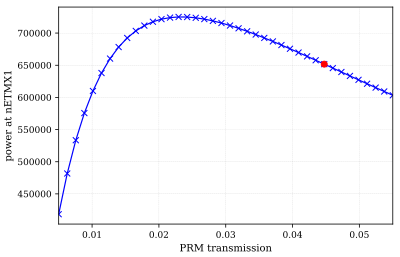

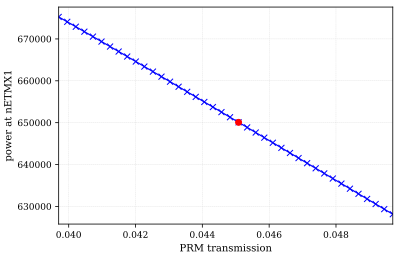

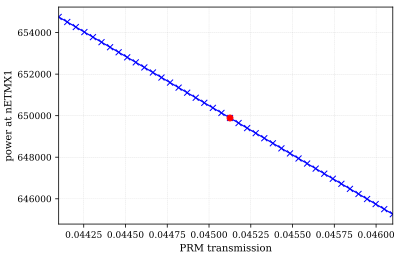

[0.0125, 0.045]


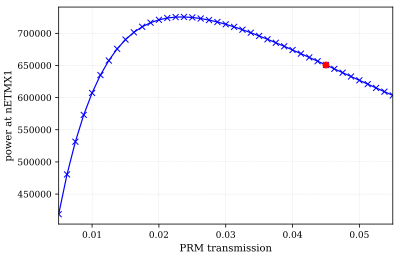

[0.04525]


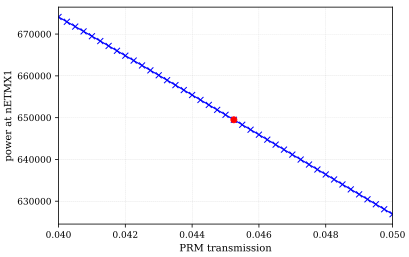

[0.04515]


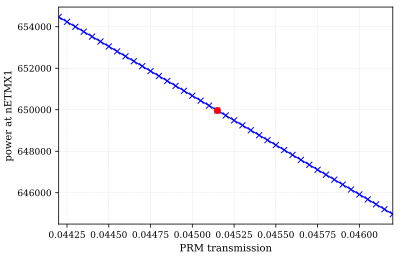

tuneT:       power = 649889.140676931 at T=0.045125641025641025 (target was 650000)
quicktuneT2: power = 649962.557237047 at T=0.0452 (target was 650000)


In [157]:
TT=650000

T,P = tuneT(aLIGO,debug=True,target=TT) 

T2,P2 = quicktuneT2(aLIGO,debug=True,target=TT) 

print("tuneT:       power = {} at T={} (target was {})".format(P,T,TT))
print("quicktuneT2: power = {} at T={} (target was {})".format(P2,T2,TT))

## vary the SRC finesse (only)

SRM transmission now 0.816
running setup()
SRM transmission now 0.546
running setup()
SRM transmission now 0.365
running setup()
SRM transmission now 0.244
running setup()
SRM transmission now 0.163
running setup()
SRM transmission now 0.109
running setup()
SRM transmission now 0.0728
running setup()
SRM transmission now 0.0486
running setup()
SRM transmission now 0.0325
running setup()


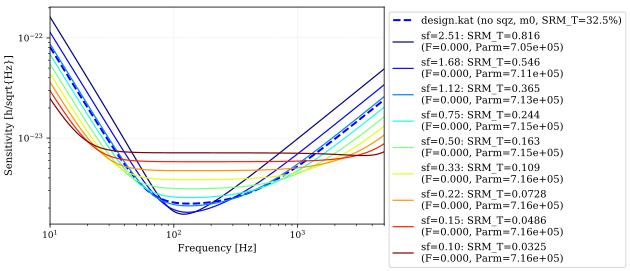

In [10]:
fig,ax=plt.subplots()

#reference line
aligoplt.strain_sensitivity(aLIGO,ax=ax,
                            plot_cmds={'label':'design.kat (no sqz, m0, SRM_T=32.5%)','ls':'--','lw':2})

#scan SRM reflectivities 
sfs = np.logspace(0.4,-1,9)
cols=cm.jet(np.linspace(0,1,len(sfs)))
for i in range(len(sfs)):
    sf=sfs[i]
    base=aLIGO.deepcopy()
    base.SRM.setRTL(1-aLIGO.SRM.T*sf-aLIGO.SRM.L,aLIGO.SRM.T*sf,aLIGO.SRM.L)
    print("SRM transmission now {:.3g}".format(float(base.SRM.T)))
    print("running setup()")
    base = aligo.setup(base) #VERY NECESSARY TO MAINTAIN RESONANCE!
    cavvals=getPF(base)
    aligoplt.strain_sensitivity(base,ax=ax,
                                plot_cmds={'label':'sf={:.2f}: SRM_T={:.3g}\n(F={:.3f}, Parm={:.3g})'.format(
                                    sf,float(base.SRM.T),cavvals[4],cavvals[1]),
                                          'color': cols[i]})

plt.legend(loc=2,bbox_to_anchor=(1,1))


For the SRC, the main effect is a change in the *shape* of the sensitivity curve, rather than the global sensitivity level. This can be characterised in a single value but instead looking at the DARM *transfer function* and extracting the **pole frequency** as a figure of merit.

In [6]:
def DARM_TF(_kat,optics=["ETMX","ETMY"],label=None,maxtem=None,
            ls='-',lw=1,plotit=False, printit = True,getfp = False):
    #
    """
    from squeezing_MM LLO ifo_design_tools study. 
    Updated Feb 2020 to specify which fpole method you use. 
    updated version of old_DARM_TF. outputs two pole values:
    fp1 = freq where sig amplitude drops to max/√2 (NB sqrt missing from old_DARM_TF, seems to be the main issue there)
    fp2 = freq where sig phase changes by -45deg *relative to starting value*
    
    commands:
    _kat   = supplied finesse model (will be deepcopied for use)
    optics = optics to be differentially shaken
    label  = title if plotted
    maxtem = max HOM order used by simulation (otherwise uses the one set in _kat)
    ls, lw = plotting instructions
    plotit = show the plot resulting from the calculations
    getfp = return the pole frequency as calculated via both methods above. 
            if True, returns out.x, out['TF'], fp, fp2    """
    kat = _kat.deepcopy()
    kat.ETMX.mass = np.inf
    kat.ITMX.mass = np.inf
    kat.ETMY.mass = np.inf
    kat.ITMY.mass = np.inf
    kat.parse("""
    fsig darm  {ax} 1 0
    fsig darm2 {ay} 1 180
    xaxis darm f log 1 10k 1000 #all fsigs get same freq so don't need a put here
    yaxis log abs:deg
    pd1 DARM_TF 1 nAS
    put DARM_TF f $x1
    """.format(ax=optics[0],ay=optics[1]))
    if maxtem != None:
        kat.maxtem = maxtem   
    out = kat.run()
    
    if plotit:
        fig = out.plot(title=label,detectors=["DARM_TF"],show=False,return_fig=True)
        
    if getfp:
    
        def M1(xx,YY):
            #Method 1: from power drop
            Y = abs(YY)
            f = interp1d(Y,xx)
            Ymax = max(Y)
            ymaxidx = list(Y).index(Ymax)
            Xmax = out.x[ymaxidx]
            Yfp = Ymax/np.sqrt(2)
            fp = f(Yfp)
            if printit:
                print("fp  = {:.3f}Hz [amplitude drops to 1/sqrt(2) from max value]".format(fp))
            return fp,Yfp,Xmax,Ymax
        
        def M2(xx,YY):
            #Method 2: from phase change - dependent on starting well below pole freq (uses phi_0 reference)
            Yphi = np.angle(YY,deg=True)
            f2 = interp1d(Yphi,xx)
            fp2 = f2(Yphi[0]-45)
            if printit:
                print("fp2 = {:.3f}Hz [phase shifts by -45deg from initial value]".format(fp2))
            return fp2,Yphi[0]-45
        
        if getfp=='fp1':
            fp1,Yfp,Xmax,Ymax = M1(out.x,out["DARM_TF"])
            if plotit:
                ax0 = fig.axes[0]
                ax0.loglog(Xmax,Ymax,'ro',label='peak')
                ax0.loglog(fp1,Yfp,'kx',label="f_p = {:.3f}Hz\n[amp=max/√2]".format(float(fp1)))
                ax0.legend(loc=2,bbox_to_anchor=(1,1))
                plt.show()
            return fp1
            
        if getfp=='fp2':
            fp2,Yfp2 = M2(out.x,out["DARM_TF"])
            if plotit:
                ax1 = fig.axes[1]
                ax1.semilogx(fp2,Yfp2,'kx',label="f_p2 = {:.3f}Hz\n[phase=$\phi_0$-45deg]".format(float(fp2)))
                ax1.legend(loc=2,bbox_to_anchor=(1,1))
                plt.show()
            return fp2
        
        if getfp=='both':
            fp1,Yfp,Xmax,Ymax = M1(out.x,out["DARM_TF"])
            fp2,Yfp2 = M2(out.x,out["DARM_TF"])
            if plotit:
                ax0 = fig.axes[0]
                ax0.loglog(Xmax,Ymax,'ro',label='peak')
                ax0.loglog(fp1,Yfp,'kx',label="f_p = {:.3f}Hz\n[amp=max/√2]".format(float(fp1)))
                ax0.legend(loc=2,bbox_to_anchor=(1,1))
                ax1 = fig.axes[1]
                ax1.semilogx(fp2,Yfp2,'kx',label="f_p2 = {:.3f}Hz\n[phase=$\phi_0$-45deg]".format(float(fp2)))
                ax1.legend(loc=2,bbox_to_anchor=(1,1))
                plt.show()
            return [fp1,fp2]
            
        
    else: return out.x,out["DARM_TF"]
                
        

SRM transmission now 0.816
running setup()
SRM transmission now 0.546
running setup()
SRM transmission now 0.365
running setup()
SRM transmission now 0.244
running setup()
SRM transmission now 0.163
running setup()
SRM transmission now 0.109
running setup()
SRM transmission now 0.0728
running setup()
SRM transmission now 0.0486
running setup()
SRM transmission now 0.0325
running setup()


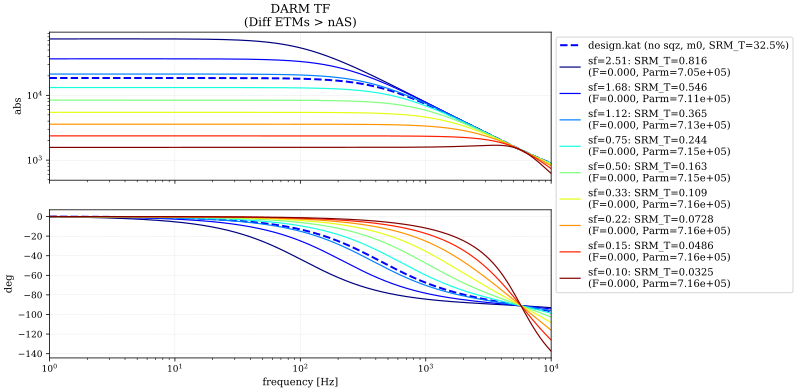

In [25]:
fig,ax=plt.subplots(2,1,figsize=(9,6),sharex=True)

#reference line
# aligoplt.strain_sensitivity(aLIGO,ax=ax,
#                             plot_cmds={'label':'design.kat (no sqz, m0, SRM_T=32.5%)','ls':'--','lw':2})
x,TF = DARM_TF(aLIGO)
ax[0].loglog(x,abs(TF),ls='--',lw=2,label='design.kat (no sqz, m0, SRM_T=32.5%)')
ax[1].semilogx(x,np.angle(TF,deg=True),ls='--',lw=2)

ax[0].set_title('DARM TF\n(Diff ETMs > nAS)')
ax[0].set_ylabel('abs')
ax[1].set_ylabel('deg')
ax[1].set_xlabel('frequency [Hz]')

#scan SRM reflectivities 
sfs = np.logspace(0.4,-1,9)
cols=cm.jet(np.linspace(0,1,len(sfs)))
for i in range(len(sfs)):
    sf=sfs[i]
    base=aLIGO.deepcopy()
    base.SRM.setRTL(1-aLIGO.SRM.T*sf-aLIGO.SRM.L,aLIGO.SRM.T*sf,aLIGO.SRM.L)
    print("SRM transmission now {:.3g}".format(float(base.SRM.T)))
    print("running setup()")
    base = aligo.setup(base) #VERY NECESSARY TO MAINTAIN RESONANCE!
    cavvals=getPF(base)
    x,TF = DARM_TF(base)
    ax[0].loglog(x,abs(TF),color=cols[i],
               label='sf={:.2f}: SRM_T={:.3g}\n(F={:.3f}, Parm={:.3g})'.format(sf,float(base.SRM.T),
                                                                               cavvals[4],cavvals[1]))
    ax[1].semilogx(x,np.angle(TF,deg=True),color=cols[i])

ax[0].legend(loc=2,bbox_to_anchor=(1,1))
# plt.tight_layout()

Tune SRM to meet target fpole

In [7]:
from pykat.external.progressbar import ProgressBar
from scipy.interpolate import interp1d

def tuneTfp_I2(_kat,target=450,optic='SRM',loss = 0, Tsteps=8, fprecision=1, Tthresh=1e-4,
            debug=False,deepdebug=False,fpmethod='phase',verbose=False):
    """
    scans the transmission of the specified optic 
    and measures the DARM pole, then interpolates to 
    find the exact transmission that gives the target pole freq.
    
    target = DARM pole that should be measured.
    optic = optic whose transmission we vary
    loss = static loss on that optic
    Tsteps = number of points in initial scan
    debug = show plot
    deepdebug = show plots of each pole measurement
    fpmethod = method used to identify pole frequency (phase or amplitude)
    verify = re-run Finesse using the value from interpolation to check the result
    fprecision = max difference between fp_out and target value allowed
    Tthresh = threshold of narrowest range of transmission values to consider
    verbose=text output
    
    """
#     print("\n>>version 4")
    if verbose:
        print("""
        reminder: 
        running with maxtem {} and setup() after each step. this will be slow!
        """.format(_kat.maxtem))
    
    if fpmethod=='amplitude':
        fpm = 'fp1'
    else:
        fpm = 'fp2' #defaults to using phase method
        
    if debug:
        fig,ax=plt.subplots()
    
    newpole = 0
    rng=1
    jj=0
    Topt=None
    while abs(newpole-target)>fprecision:
        if verbose:
            print("stage {}".format(jj))
    
        if Topt:
            Tvals = np.linspace(Topt-rng, Topt+rng,Tsteps)
        else: #first run: small offsets from top and bottom so we always have pretuning signals for setup()
            Tvals = np.linspace(1e-6,1-1e-6-loss,Tsteps)
            
        if max(Tvals)-min(Tvals) < Tthresh:
            if verbose:
                print('Tval range narrower than threshold ({}), stopping.'.format(Tthresh))
            return Topt
        
        else:
            poles = []
            
            if verbose:
                pb = ProgressBar()
                pb.maxval = len(Tvals)

            i=0
            for T in Tvals:
                k=_kat.deepcopy()
                k.components[optic].setRTL(1-T-loss,T,loss)
                k = aligo.setup(k)
                poles.append(DARM_TF(k,optics=["LX","LY"],plotit=deepdebug,printit=False,getfp ='fp2'))
                i+=1
                if verbose:
                    pb.update(i)
            if debug:
#                 #for now to check the initial run
#                 f,a=plt.subplots()
#                 a.plot(Tvals,poles,label='stage {} full run'.format(jj))
#                 f.show()
                #for the full stepping-in plot
                ax.plot(Tvals,poles,label='stage {} full run'.format(jj))
                

            f = interp1d(poles,Tvals)
            Topt = f(target)


            if debug:
                testffs = np.linspace(min(poles),max(poles),Tsteps*10)
                ax.plot(f(testffs),testffs,'--',lw=2,alpha=0.5,label='stage {} interpolated line'.format(jj))
                ax.plot(Topt,target,'x',label='stage {}: T={:.3f}'.format(jj,Topt))
            
            if verbose:
                print('verifying...')
            k=_kat.deepcopy()
            k.components[optic].setRTL(1-Topt-loss,Topt,loss)
            k = aligo.setup(k)
            newpole = DARM_TF(k,optics=["LX","LY"],plotit=deepdebug,printit=False,getfp ='fp2')
            if verbose:
                print('with T={:.4f}, found pole: {:1f}Hz; target was {:.1f}Hz'.format(Topt,newpole,target))
            if abs(newpole-target)>fprecision:
                if verbose:
                    print('new value is more than {:g}Hz away from target. Running again over narrower range.'.format(fprecision))
                rng/=10
                jj+=1

        if debug:
            ax.set_xlabel('{}_T'.format(optic))
            ax.set_ylabel('DARM pole [Hz]')
            ax.legend()
            fig.show()
            

    return Topt, newpole



    reminder: 
    running with maxtem -1 and setup() after each step. this will be slow!
    
stage 0


100% (8 of 8) |###########################| Elapsed Time: 0:00:25 ETA:  0:00:00

verifying...
with T=0.3198, found pole: 434.830727Hz; target was 450.0Hz
new value is more than 1Hz away from target. Running again over narrower range.
stage 1


100% (8 of 8) |###########################| Elapsed Time: 0:00:25 ETA:  0:00:00

verifying...
with T=0.3111, found pole: 449.352416Hz; target was 450.0Hz

    reminder: 
    running with maxtem -1 and setup() after each step. this will be slow!
    
stage 0


100% (8 of 8) |###########################| Elapsed Time: 0:00:25 ETA:  0:00:00

verifying...
with T=0.3565, found pole: 381.222757Hz; target was 400.0Hz
new value is more than 1Hz away from target. Running again over narrower range.
stage 1


100% (8 of 8) |###########################| Elapsed Time: 0:00:25 ETA:  0:00:00

verifying...
with T=0.3428, found pole: 399.941802Hz; target was 400.0Hz

    reminder: 
    running with maxtem 2 and setup() after each step. this will be slow!
    
stage 0


100% (8 of 8) |###########################| Elapsed Time: 0:02:36 ETA:  0:00:00

verifying...
with T=0.3190, found pole: 435.215035Hz; target was 450.0Hz
new value is more than 1Hz away from target. Running again over narrower range.
stage 1


100% (8 of 8) |###########################| Elapsed Time: 0:01:22 ETA:  0:00:00

verifying...
with T=0.3105, found pole: 449.331840Hz; target was 450.0Hz


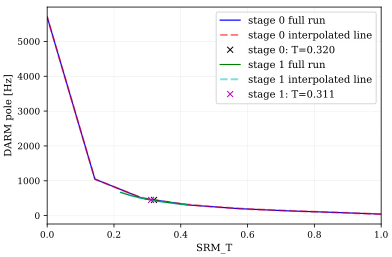

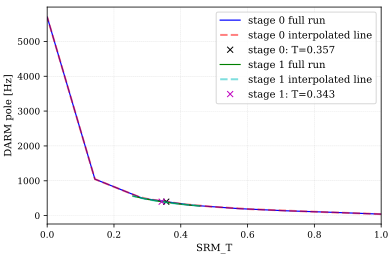

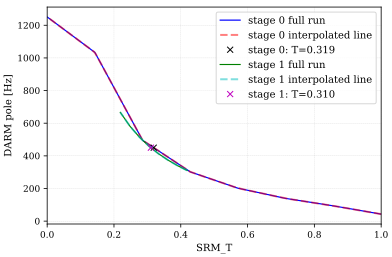

In [34]:
T_SRM, fp =tuneTfp_I2(aLIGO,target=450,loss = aLIGO.SRM.L,debug=True)

T_SRM, fp =tuneTfp_I2(aLIGO,target=400,loss = aLIGO.SRM.L,debug=True)

kk=aLIGO.deepcopy()
kk.maxtem=2
kk=aligo.setup(kk)
T_SRM, fp =tuneTfp_I2(kk,target=450,loss = aLIGO.SRM.L,debug=True)


## put it all together

### broader search at several maxtem

In [ ]:
maxtemkats = []

sfs = np.linspace(1,0.5,9)
cols=cm.jet(np.linspace(0,1,len(sfs)))

for mm in [-1,4]:
    model = aLIGO.deepcopy()
    model.maxtem=mm
    model=aligo.setup(model)

    fig , ax  = plt.subplots(len(sfs),1,tight_layout=True,sharex=True,sharey=True,figsize=(10,len(sfs)*3)) #QNLS

    print("reference values: ")
    print('\nmaxtem: {}'.format(model.maxtem))
    printTs(model)
    getPF(model,printit=True)
    #reference line
    refvals=getPF(model)
    refPow=refvals[1]
    reffp = DARM_TF(model,optics=["LX","LY"],getfp ='fp2')
    print()

    outkats=[]
    for i in range(len(sfs)):
        print('-------------')
        sf=sfs[i]
        aligoplt.strain_sensitivity(model,ax=ax[i],
                            plot_cmds={'label':'design.kat (no sqz)',
                                           'ls':'--','lw':2})
        base=model.deepcopy()

        ###change ITM reflectivities
        base.ITMX.setRTL(1-model.ITMX.T*sf-model.ITMX.L,model.ITMX.T*sf,model.ITMX.L)
        base.ITMY.setRTL(1-model.ITMY.T*sf-model.ITMY.L,model.ITMY.T*sf,model.ITMY.L)
        print("ITMX_T = {:.3g} (=ITMY_T). running setup()".format(float(base.ITMX.T)))
        base = aligo.setup(base) #VERY NECESSARY TO MAINTAIN RESONANCE!
        cavvals=getPF(base)
        aligoplt.strain_sensitivity(base,ax=ax[i],
                                    plot_cmds={'label':'ITM transmissions changed','lw':1.5,'ls':':'})

        ##tune PRM transmission to get back to original arm power
        print('restoring Parm to target of {:.0f}W with PRM_T...'.format(refvals[1]),end=' ')
#         T,P = tuneT(base,optic='PRM',node='nETMX1',val=0.03,precision=0.025,
#               target_precision=None,target=refPow,debug=False) #<---------Looping OFF for now - VV slow here
        T,P = quicktuneT2(base,optic='PRM',node='nETMX1',val=0.05,precision=0.045,
               target_precision=None,target=refPow,debug=False)#<looping off, not setup() in this version but difference is minor
        base1=base.deepcopy()
        base1.PRM.setRTL(1-T-base1.PRM.L, T,base1.PRM.L)
        print('PRM_T = {:.4f}. running setup()'.format(T))
        base1 = aligo.setup(base1)
        cavvals1=getPF(base1)
        aligoplt.strain_sensitivity(base1,ax=ax[i],
                                    plot_cmds={'label':'restoring Parm'})

        ##tune SRM transmission to get the sensitivity curve back
        print('restoring DARM pole to target of {:.3f}Hz using SRM_T...'.format(reffp),end='  ')
        T_SRM, fp = tuneTfp_I2(base1,target=reffp,loss = model.SRM.L)#,debug=True
        base2=base1.deepcopy()
        base2.SRM.setRTL(1-T_SRM-base2.PRM.L, T_SRM ,base2.PRM.L)
        print('SRM_T = {:.4f}. running setup()'.format(T_SRM))
        base2 = aligo.setup(base2)
        cavvals2=getPF(base2)
        aligoplt.strain_sensitivity(base2,ax=ax[i],
                                    plot_cmds={'label':'restoring DARM pole'})


        ax[i].set_title("sf={:.2f}: ITMX_T={:.3g}=ITMY_T".format(sf,float(base.ITMX.T)),color=cols[i])
        ax[i].legend(loc=2,bbox_to_anchor=(1,1))
        
        base2.save("kats/aLIGO_maxtem{}_ITMsf={}.kat".format(base2.maxtem,sf))

        outkats.append(base2)
    
    fig.show()
    maxtemkats.append(outkats)

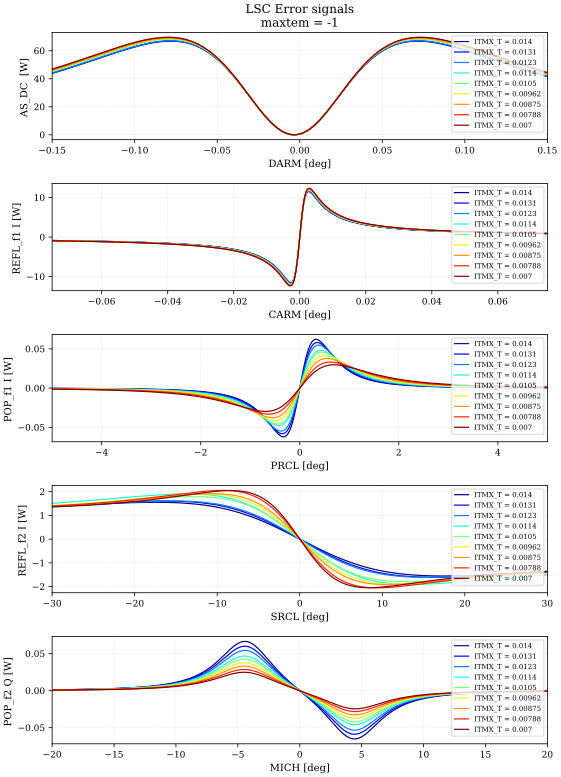

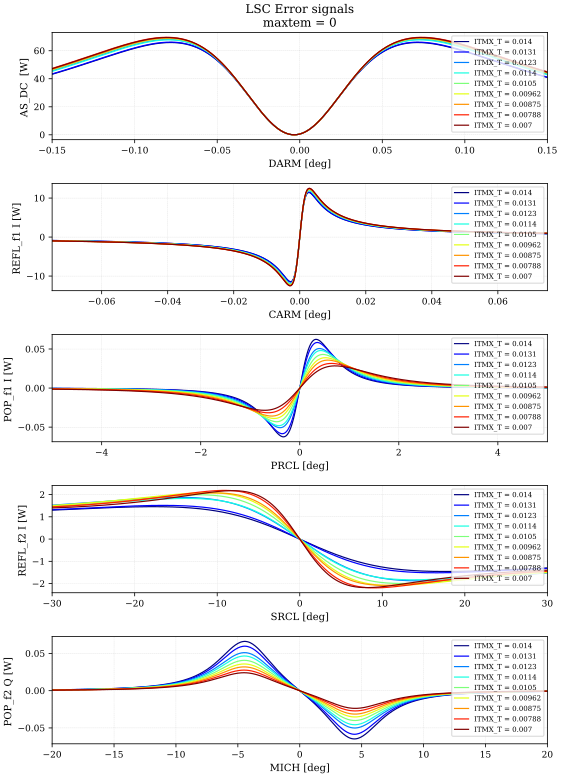

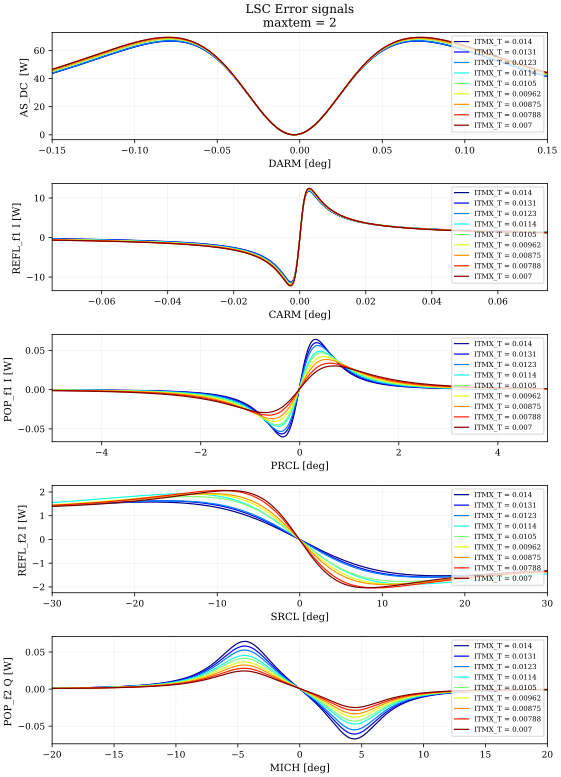

In [162]:
#xaxis scaling:
#[kat.IFO.DARM, kat.IFO.CARM, kat.IFO.PRCL, kat.IFO.SRCL, kat.IFO.MICH]
xsc = [0.15,0.05,0.05,0.3,0.2]
xlims=[[-aa,aa] for aa in xsc]

steps=400
# #
# sfs = np.linspace(1,0.5,9) #as in the preceeding cell

for outkats in maxtemkats:
    
    fig2, ax2 = plt.subplots(5,1,figsize=(8,11),tight_layout=True)#Errsigs
    ax2[0].set_title("LSC Error signals\nmaxtem = {}".format(outkats[0].maxtem))

    for k,i in zip(outkats,range(len(sfs))):
        ##plot the error signals
        label="ITMX_T = {:.3g}".format(float(k.ITMX.T))
        col=cols[i]

        kat = k.deepcopy()
        kat.removeBlock('locks')
        DOFs = [kat.IFO.DARM, kat.IFO.CARM, kat.IFO.PRCL, kat.IFO.SRCL, kat.IFO.MICH]
        for d,idx in zip(DOFs,range(len(DOFs))):
            _k=kat.deepcopy()
            _k.parse(d.signal())
            scan_cmd = aligoplt.scan_optics_string(d.optics, d.factors, "scan", linlog="lin",
                                                xlimits=np.multiply(d.scale, xlims[idx]), steps=steps, relative=True)
            _k.parse(scan_cmd)
            o=_k.run()

            DC_Offset = None  
            # Get a lock offset if used
            if (d.name + '_lock') in _k.commands:
                DC_Offset = _k.commands[d.name + '_lock'].offset
            if DC_Offset is None:
                DC_Offset = 0
            else:
                DC_Offset = float(DC_Offset)

            ax2[idx].plot(o.x, o[d.signal_name()] + DC_Offset, label=label,color=col)
            ax2[idx].set_ylabel('{} {} [W] '.format(d.port.name, d.quad))
            ax2[idx].legend(loc=1,fontsize=7)
            ax2[idx].grid(True)
            ax2[idx].set_xlim([np.min(o.x), np.max(o.x)])
            ax2[idx].set_xlabel("{} [deg]".format(d.name))
        
    fig2.savefig("Errsigs_maxtem={}.pdf".format(outkats[0].maxtem))
    fig2.show()

-----------------------------


In [ ]:
testk = maxtemkats[0][0].deepcopy()
testk.IFO.CARM

In [140]:
kk = finesse.kat()
kk.verbose=False
kk.load("kats/aLIGO_maxtem-1_ITMsf=0.5.kat")
kk.IFO

AttributeError: 'NoneType' object has no attribute 'DARM'

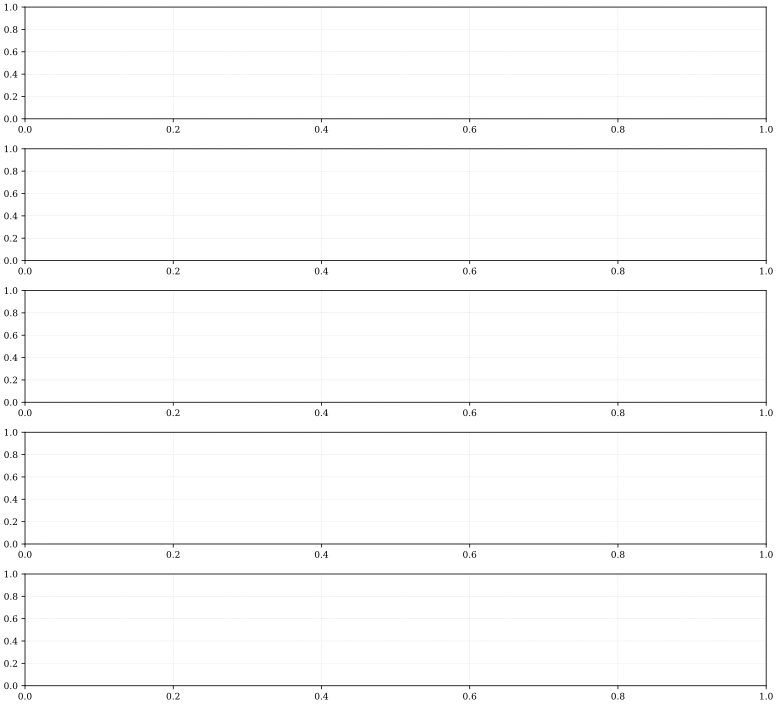

In [121]:
xlim=[-0.2,0.2]
steps=200

for mm in [-1,0]:
    
    fig2, ax2 = plt.subplots(5,1,figsize=(11,10),tight_layout=True)#Errsigs

    for i in range(len(sfs)):
        ##plot the error signals
        col=cols[i]

        kat = finesse.kat()
        kat.verbose=False
        kat.load("kats/aLIGO_maxtem{}_ITMsf={}.kat".format(base2.maxtem,sfs[i]))
        
        label="ITMX_T = {:.3g}".format(float(kat.ITMX.T))
        
        kat.removeBlock('locks')
        DOFs = [kat.IFO.DARM, kat.IFO.CARM, kat.IFO.PRCL, kat.IFO.SRCL, kat.IFO.MICH]
        for d,idx in zip(DOFs,range(len(DOFs))):
            _k=kat.deepcopy()
            _k.parse(d.signal())
            scan_cmd = aligoplt.scan_optics_string(d.optics, d.factors, "scan", linlog="lin",
                                                xlimits=np.multiply(d.scale, xlim), steps=steps, relative=True)
            _k.parse(scan_cmd)
            o=_k.run()

            DC_Offset = None  
            # Get a lock offset if used
            if (d.name + '_lock') in _k.commands:
                DC_Offset = _k.commands[d.name + '_lock'].offset
            if DC_Offset is None:
                DC_Offset = 0
            else:
                DC_Offset = float(DC_Offset)

            ax2[idx].plot(o.x, o[d.signal_name()] + DC_Offset, label=label,color=col)
            ax2[idx].set_ylabel('{} {} [W] '.format(d.port.name, d.quad))
            ax2[idx].legend(loc=2,bbox_to_anchor=(1,1))
            ax2[idx].grid(True)
            ax2[idx].set_xlim([np.min(o.x), np.max(o.x)])
            ax2[idx].set_xlabel("{} [deg]".format(d.name))
            
            ax2[0].set_title("LSC Error signals\nmaxtem = {}".format(kat.maxtem))
        
        fig2.savefig("Errsigs_maxtem={}.pdf".format(outkats[0].maxtem))
        fig2.show()

##### <font color='burgundy'>findings so far</font>

functionally: 
* interpolator crashes with maxtem !=-1,0 (kind of irregularly).
* saved kat objects don't retain the IFO.DARM etc DOFs.

science-wise:
* sign flip in SRCL around ITM_T=0.010? Also split DARM behaviour around that point --> PRM-setter breaking! :):):)

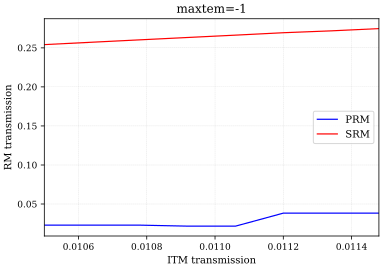

In [149]:
xlim=[-0.1,0.1]
steps=400
np.linspace(0.75,0.82,8)

for outkats in maxtemkats:
    II = []
    PP = []
    SS = []
    for k in outkats:
        II.append(k.ITMX.T)
        PP.append(k.PRM.T)
        SS.append(k.SRM.T)
    plt.figure()
    plt.plot(II,PP,label='PRM')
    plt.plot(II,SS,label='SRM')
    plt.xlabel('ITM transmission')
    plt.ylabel('RM transmission')
    plt.legend()
    plt.title("maxtem={}".format(outkats[0].maxtem))

Hmm, doesn't show up in the final files, so where is the full func getting the ~0.45 values from? rerun just that part:

reference values: 

maxtem: -1

    Optic:       Transmission:      Loss
    ITMX         0.014             3.75e-05
    ITMY         0.014             3.75e-05
    PRM          0.03             8.5e-06
    SRM          0.325             8.7e-06
    

    Cav:      Finesse:     Pcirc:
    Xarm      0       7.14e+05
    PRX       0.0000       5367
    SRX       0.0000       4.772
        
fp2 = 426.532Hz [phase shifts by -45deg from initial value]

-------------
ITMX_T = 0.014 (=ITMY_T). running setup()
restoring Parm to target of 713777W with PRM_T... 

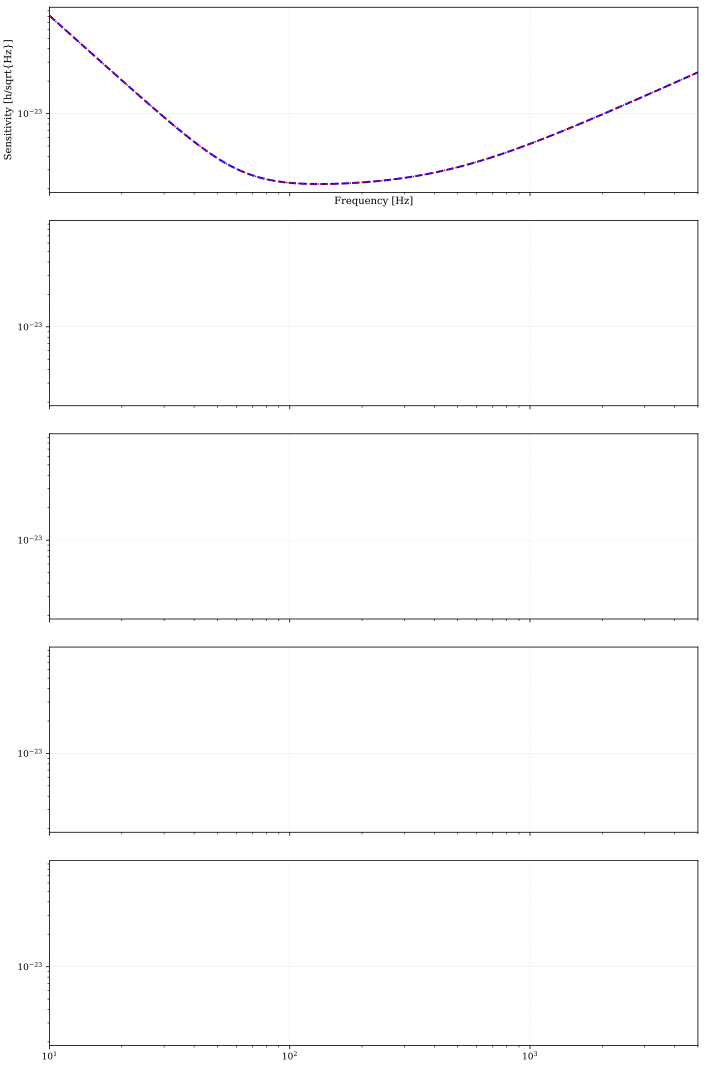

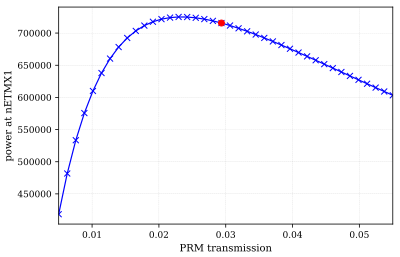

PRM_T = 0.0294. running setup()
-------------
ITMX_T = 0.0123 (=ITMY_T). running setup()
restoring Parm to target of 713777W with PRM_T... 

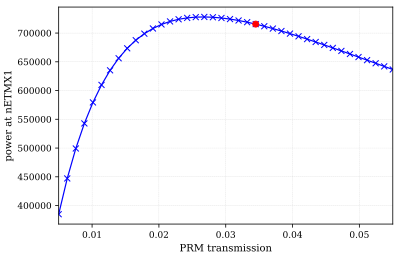

PRM_T = 0.0345. running setup()
-------------
ITMX_T = 0.0105 (=ITMY_T). running setup()
restoring Parm to target of 713777W with PRM_T... 

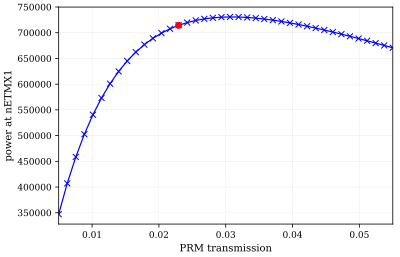

PRM_T = 0.0229. running setup()
-------------
ITMX_T = 0.00875 (=ITMY_T). running setup()
restoring Parm to target of 713777W with PRM_T... 

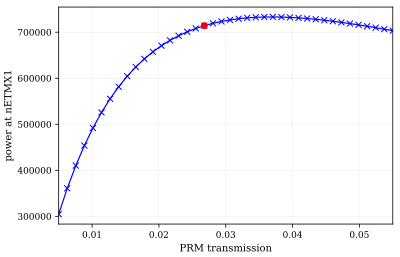

PRM_T = 0.0268. running setup()
-------------
ITMX_T = 0.007 (=ITMY_T). running setup()
restoring Parm to target of 713777W with PRM_T... 

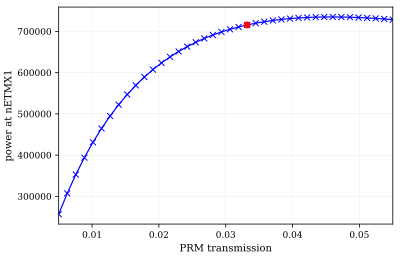

PRM_T = 0.0332. running setup()


AttributeError: 'NoneType' object has no attribute 'removed'

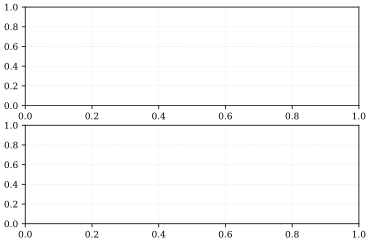

In [153]:
#running up to PRM-updated plot with tuneT debugger on and extracting T,P too

maxtemkats = []


model = aLIGO.deepcopy()
model.maxtem=-1
model=aligo.setup(model)

sfs = np.linspace(1,0.5,5)
cols=cm.jet(np.linspace(0,1,len(sfs)))

fig , ax  = plt.subplots(len(sfs),1,tight_layout=True,sharex=True,sharey=True,figsize=(10,len(sfs)*3)) #QNLS

print("reference values: ")
print('\nmaxtem: {}'.format(model.maxtem))
printTs(model)
getPF(model,printit=True)
#reference line
refvals=getPF(model)
refPow=refvals[1]
reffp = DARM_TF(model,optics=["LX","LY"],getfp ='fp2')
print()

PRMTs=[]
cavPs=[]
ITMTs=[]
for i in range(len(sfs)):
    print('-------------')
    sf=sfs[i]
    aligoplt.strain_sensitivity(model,ax=ax[i],
                        plot_cmds={'label':'design.kat (no sqz)',
                                       'ls':'--','lw':2})
    base=model.deepcopy()

    ###change ITM reflectivities
    base.ITMX.setRTL(1-model.ITMX.T*sf-model.ITMX.L,model.ITMX.T*sf,model.ITMX.L)
    base.ITMY.setRTL(1-model.ITMY.T*sf-model.ITMY.L,model.ITMY.T*sf,model.ITMY.L)
    print("ITMX_T = {:.3g} (=ITMY_T). running setup()".format(float(base.ITMX.T)))
    base = aligo.setup(base) #VERY NECESSARY TO MAINTAIN RESONANCE!
    cavvals=getPF(base)
    aligoplt.strain_sensitivity(base,ax=ax[i],
                                plot_cmds={'label':'ITM transmissions changed','lw':1.5,'ls':':'})

    ##tune PRM transmission to get back to original arm power
    print('restoring Parm to target of {:.0f}W with PRM_T...'.format(refvals[1]),end=' ')
    T,P = tuneT(base,optic='PRM',node='nETMX1',val=0.03,precision=0.025,
          target_precision=None,target=refPow,debug=True) #<---------Looping OFF for now
    base1=base.deepcopy()
    base1.PRM.setRTL(1-T-base1.PRM.L, T,base1.PRM.L)
    print('PRM_T = {:.4f}. running setup()'.format(T))
    base1 = aligo.setup(base1)
    cavvals1=getPF(base1)
    aligoplt.strain_sensitivity(base1,ax=ax[i],
                                plot_cmds={'label':'restoring Parm'})
    PRMTs.append(T)
    cavPs.append(P)
    ITMTs.append(base1.ITMX.T)
    

#     ##tune SRM transmission to get the sensitivity curve back
#     print('restoring DARM pole to target of {:.3f}Hz using SRM_T...'.format(reffp),end='  ')
#     T_SRM, fp = tuneTfp_I2(base1,target=reffp,loss = model.SRM.L)#,debug=True
#     base2=base1.deepcopy()
#     base2.SRM.setRTL(1-T_SRM-base2.PRM.L, T_SRM ,base2.PRM.L)
#     print('SRM_T = {:.4f}. running setup()'.format(T_SRM))
#     base2 = aligo.setup(base2)
#     cavvals2=getPF(base2)
#     aligoplt.strain_sensitivity(base2,ax=ax[i],
#                                 plot_cmds={'label':'restoring DARM pole'})


#     ax[i].set_title("sf={:.2f}: ITMX_T={:.3g}=ITMY_T".format(sf,float(base.ITMX.T)),color=cols[i])
#     ax[i].legend(loc=2,bbox_to_anchor=(1,1))

#     base2.save("kats/aLIGO_maxtem{}_ITMsf={}.kat".format(base2.maxtem,sf))

#     outkats.append(base2)

# fig.show()
# maxtemkats.append(outkats)
fig,ax=plt.subplots(2,1)
ax[0].plot(ITMTs,PRMTs)
ax[1].plot(ITMTs,cavPs)

-----------------

## Notes

In [116]:
fig2.savefig??

In [111]:
model.save("test.kat")

Text(0.5, 1.0, 'Hi')

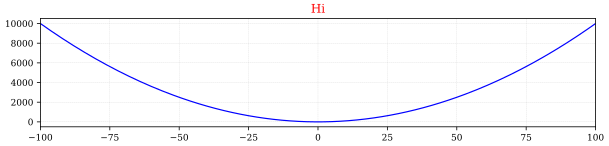

In [97]:
plt.figure(figsize=(10,2))
plt.plot(o.x,o.x**2)
plt.title('Hi',color='r')

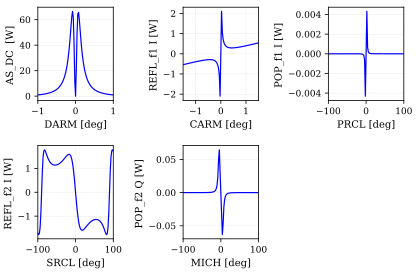

In [78]:
aligoplt.error_signals(aLIGO)

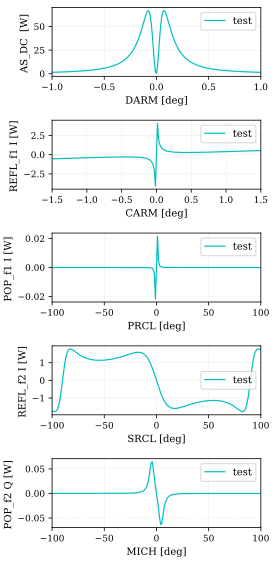

In [89]:
label="test"
xlim=[-1,1]
steps=200
col='c'
fsz = (4,8)

kat = aLIGO.deepcopy()
kat.removeBlock('locks')
DOFs = [kat.IFO.DARM, kat.IFO.CARM, kat.IFO.PRCL, kat.IFO.SRCL, kat.IFO.MICH]

fig,ax = plt.subplots(len(DOFs),1,figsize=fsz,tight_layout=True)
  
for d,idx in zip(DOFs,range(len(DOFs))):
    _k=kat.deepcopy()
    _k.parse(d.signal())
    scan_cmd = aligoplt.scan_optics_string(d.optics, d.factors, "scan", linlog="lin",
                                        xlimits=np.multiply(d.scale, xlim), steps=steps, relative=True)
    _k.parse(scan_cmd)
    o=_k.run()
    
    DC_Offset = None  
    # Get a lock offset if used
    if (d.name + '_lock') in _k.commands:
        DC_Offset = _k.commands[d.name + '_lock'].offset
    if DC_Offset is None:
        DC_Offset = 0
    else:
        DC_Offset = float(DC_Offset)

    ax[idx].plot(o.x, o[d.signal_name()] + DC_Offset, label=label,color=col)
    ax[idx].set_ylabel('{} {} [W] '.format(d.port.name, d.quad))
    ax[idx].legend(loc=0)
    ax[idx].grid(True)
    ax[idx].set_xlim([np.min(o.x), np.max(o.x)])
    ax[idx].set_xlabel("{} [deg]".format(d.name))

In [188]:
aligoplt.strain_sensitivity??

In [175]:
tuneT??

In [70]:
aligoplt.strain_sensitivity??

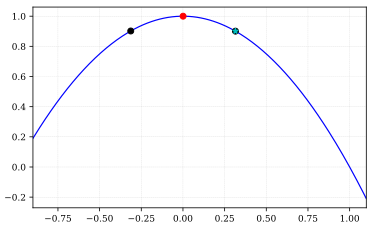

In [148]:
center = 0.1
target=0.9
X = np.linspace(center-1,center+1,243)
Y = 1-X**2

#if we just want the maximum
yout = max(Y)
xout = X[list(Y).index(yout)]

#if we want to find a target value
#compare all vals to the target and find the minima
diffs = np.abs(Y-target)
_max,_min = peak.peakdetect(diffs,X,1) #not sure we really need a fancy peak detector here...
XX = [p[0] for p in _min] #X-vals for the minima. p[1] contains the values of those minima
YY = [Y[list(X).index(x)] for x in XX] #Y-vals corresponding to the minima
#if there's more than one closest match, select the one thats closest to the originally considered value of X (center)
diffs2 = [abs(x-center) for x in XX]
xout2=XX[np.argmin(diffs2)]
yout2=YY[np.argmin(diffs2)]


plt.plot(X,Y)
plt.plot(xout,yout,'o')
plt.plot(XX,YY,'o')
plt.plot(xout2,yout2,'*',color='c')
plt.show()
# idx = (diffs).argmin()
# print(idx)
# y2 = Y[idx]
# x2 = X[idx]
# plt.plot(x2,y2,'o')

In [ ]:
#     ##option 1: maximise power each time. (******Just to test it, use opt2 in full version!)
#     print('maximizing Parm with PRM_T...',end=' ')
#     T,P = tuneT(base,optic='PRM',node='nETMX1',val=0.03,precision=0.025,
#           target_precision=None,target='max',debug=False) #<---------Looping OFF for now
#     base1=base.deepcopy()
#     base1.PRM.setRTL(1-T-base1.PRM.L, T,base1.PRM.L)
#     print('PRM_T = {}. running setup()'.format(T))
#     base1 = aligo.setup(base1)
#     cavvals1=getPF(base1)
#     aligoplt.strain_sensitivity(base1,ax=ax[i],
#                                 plot_cmds={'label':'maximise Parm\nArm_F={:.3f}, PRX_F={:.3f}, Parm={:.0f}'.format(
#                                     cavvals1[0],cavvals1[2],cavvals1[1])})
    ##option 2: return power to original value each time <--maintain the original sensitivity curve rather than optimize it